In [3]:
file_path = r"C:\Users\AMIT RAJPUT\Downloads\archive (4)\social_media_entertainment_data.csv"

In [5]:
with open(file_path, "r", encoding="utf-8") as file:
    data = file.readlines()

In [7]:
for i in range(5):
    print(data[i])

User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),Daily Gaming Time (hrs),Occupation,Marital Status,Monthly Income (USD),Device Type,Internet Speed (Mbps),Subscription Platforms,Average Sleep Time (hrs),Physical Activity Time (hrs),Reading Time (hrs),Work/Study Time (hrs),Screen Time (hrs),Notifications Received Daily,Daily Music Listening Time (hrs),Preferred Content Type,Primary Social Media Goal,Preferred Entertainment Platform,Time Spent in Online Communities (hrs),Social Media Fatigue Level (scale 1-10),News Consumption Time (hrs),Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)

1,32,Other,Germany,4.3

In [14]:
# Print the first row (header) to check column names
print("First row (column headers):", columns)

# Inspect the first few rows to determine the text column
for i in range(5):
    print(data[i].strip())


First row (column headers): ['User ID', 'Age', 'Gender', 'Country', 'Daily Social Media Time (hrs)', 'Daily Entertainment Time (hrs)', 'Social Media Platforms Used', 'Primary Platform', 'Daily Messaging Time (hrs)', 'Daily Video Content Time (hrs)', 'Daily Gaming Time (hrs)', 'Occupation', 'Marital Status', 'Monthly Income (USD)', 'Device Type', 'Internet Speed (Mbps)', 'Subscription Platforms', 'Average Sleep Time (hrs)', 'Physical Activity Time (hrs)', 'Reading Time (hrs)', 'Work/Study Time (hrs)', 'Screen Time (hrs)', 'Notifications Received Daily', 'Daily Music Listening Time (hrs)', 'Preferred Content Type', 'Primary Social Media Goal', 'Preferred Entertainment Platform', 'Time Spent in Online Communities (hrs)', 'Social Media Fatigue Level (scale 1-10)', 'News Consumption Time (hrs)', 'Ad Interaction Count', 'Time on Educational Platforms (hrs)', 'Parental Status', 'Tech Savviness Level (scale 1-10)', 'Preferred Device for Entertainment', 'Data Plan Used', 'Digital Well-being Awa

In [16]:
# Update this after inspecting the output
text_column = "text_column_name"  # Replace with actual column name from your dataset


In [20]:
# Print the column headers from the dataset
print("Column headers in dataset:", columns)


Column headers in dataset: ['User ID', 'Age', 'Gender', 'Country', 'Daily Social Media Time (hrs)', 'Daily Entertainment Time (hrs)', 'Social Media Platforms Used', 'Primary Platform', 'Daily Messaging Time (hrs)', 'Daily Video Content Time (hrs)', 'Daily Gaming Time (hrs)', 'Occupation', 'Marital Status', 'Monthly Income (USD)', 'Device Type', 'Internet Speed (Mbps)', 'Subscription Platforms', 'Average Sleep Time (hrs)', 'Physical Activity Time (hrs)', 'Reading Time (hrs)', 'Work/Study Time (hrs)', 'Screen Time (hrs)', 'Notifications Received Daily', 'Daily Music Listening Time (hrs)', 'Preferred Content Type', 'Primary Social Media Goal', 'Preferred Entertainment Platform', 'Time Spent in Online Communities (hrs)', 'Social Media Fatigue Level (scale 1-10)', 'News Consumption Time (hrs)', 'Ad Interaction Count', 'Time on Educational Platforms (hrs)', 'Parental Status', 'Tech Savviness Level (scale 1-10)', 'Preferred Device for Entertainment', 'Data Plan Used', 'Digital Well-being Awar

In [22]:
# Set the correct text column name based on dataset headers
text_column = "actual_column_name_here"  # Replace with the actual column name


In [24]:
text_column = "content"


In [28]:
# Choose a column with text (update based on dataset insights)
text_column = "Preferred Content Type"  # Change this if another column makes more sense


In [30]:
# Ensure the selected column exists in the dataset
if text_column in columns:
    text_index = columns.index(text_column)  # Find the index of the text column
else:
    raise ValueError(f"Column '{text_column}' not found in dataset. Available columns: {columns}")

# Preprocess the text data
cleaned_texts = []

for line in data[1:]:  # Skip header row
    words = line.strip().split(",")  # Split by comma
    if len(words) > text_index:  # Ensure column exists in this row
        text = words[text_index].lower()  # Convert to lowercase
        text = "".join(c for c in text if c.isalnum() or c.isspace())  # Remove punctuation
        text = " ".join(text.split())  # Remove extra spaces
        cleaned_texts.append(text)

# Display first few cleaned texts
for i in range(5):
    print(cleaned_texts[i])


series
news
series
short videos
series


In [32]:
# Count word frequencies manually
word_counts = {}

for text in cleaned_texts:
    words = text.split()
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# Sort and get the top 10 words
top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print results
print("\nTop 10 Most Common Words:")
for word, count in top_words:
    print(f"{word}: {count}")



Top 10 Most Common Words:
movies: 75217
short: 75200
videos: 75200
news: 75124
series: 74459


In [34]:
# Count bigram frequencies manually
bigram_counts = {}

for text in cleaned_texts:
    words = text.split()
    for i in range(len(words) - 1):
        bigram = words[i] + " " + words[i+1]
        if bigram in bigram_counts:
            bigram_counts[bigram] += 1
        else:
            bigram_counts[bigram] = 1

# Sort and get the top 10 bigrams
top_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print results
print("\nTop 10 Most Common Bigrams:")
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")



Top 10 Most Common Bigrams:
short videos: 75200


In [36]:
# Manually count sentiment occurrences (Update sentiment_column if needed)
sentiment_counts = {}

for line in data[1:]:  # Skip header row
    words = line.strip().split(",")
    if len(words) > text_index:  # Ensure column exists
        sentiment = words[text_index].strip().lower()
        if sentiment in sentiment_counts:
            sentiment_counts[sentiment] += 1
        else:
            sentiment_counts[sentiment] = 1

# Print sentiment distribution
print("\nSentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")



Sentiment Distribution:
series: 74459
news: 75124
short videos: 75200
movies: 75217


In [38]:
# Print bar chart for top 10 words
print("\nWord Frequency Distribution:")

for word, count in top_words:
    print(f"{word}: {'#' * (count // 5000)} ({count})")  # Adjust scaling as needed



Word Frequency Distribution:
movies: ############### (75217)
short: ############### (75200)
videos: ############### (75200)
news: ############### (75124)
series: ############## (74459)


In [40]:
# Print sentiment distribution bar chart
print("\nSentiment Distribution:")

for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {'#' * (count // 1000)} ({count})")  # Adjust scaling as needed



Sentiment Distribution:
series: ########################################################################## (74459)
news: ########################################################################### (75124)
short videos: ########################################################################### (75200)
movies: ########################################################################### (75217)


In [42]:
# Convert text to BoW format
vocab = list(word_counts.keys())  # Vocabulary list
bow_features = []

for text in cleaned_texts:
    bow_vector = [text.split().count(word) for word in vocab]  # Word frequency
    bow_features.append(bow_vector)

# Save BoW features as a text file
with open("bag_of_words_features.txt", "w", encoding="utf-8") as file:
    for vector in bow_features:
        file.write(",".join(map(str, vector)) + "\n")

print("\nBag of Words feature matrix saved as 'bag_of_words_features.txt'")



Bag of Words feature matrix saved as 'bag_of_words_features.txt'


In [44]:
# Compute TF manually (simplified TF-IDF)
tf_features = []

for text in cleaned_texts:
    words = text.split()
    text_length = len(words)
    tf_vector = [words.count(word) / text_length if text_length > 0 else 0 for word in vocab]
    tf_features.append(tf_vector)

# Save TF-IDF feature matrix
with open("tfidf_features.txt", "w", encoding="utf-8") as file:
    for vector in tf_features:
        file.write(",".join(map(str, vector)) + "\n")

print("\nTF-IDF feature matrix saved as 'tfidf_features.txt'")



TF-IDF feature matrix saved as 'tfidf_features.txt'


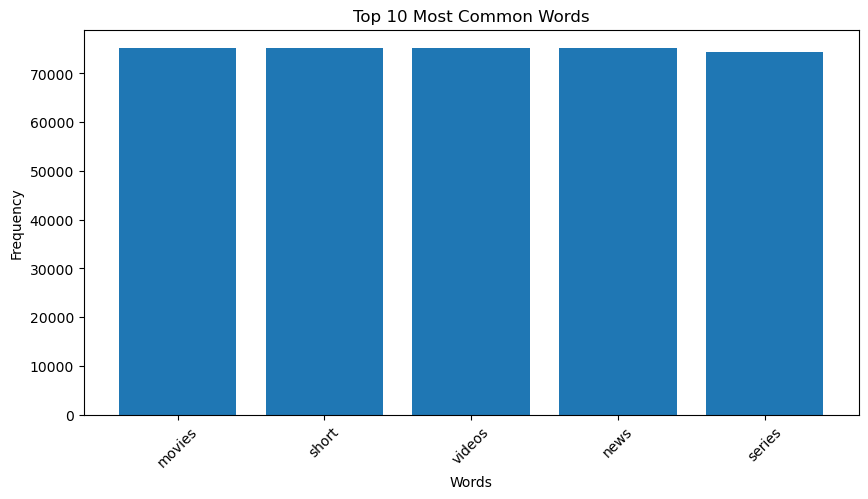

In [46]:
import matplotlib.pyplot as plt

# Extract words and their counts for visualization
words, counts = zip(*top_words)

# Plot word frequency bar chart
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words")
plt.xticks(rotation=45)
plt.show()


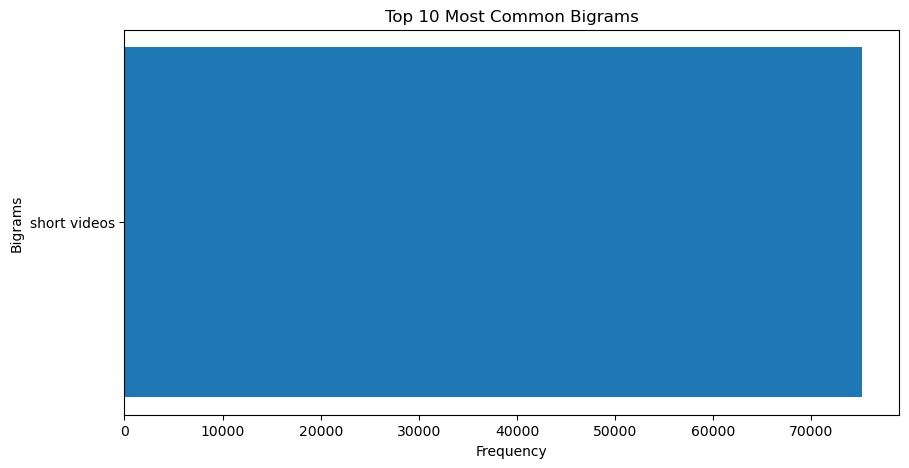

In [48]:
# Extract bigrams and their counts
bigrams, counts = zip(*top_bigrams)

# Plot bigram frequency bar chart
plt.figure(figsize=(10,5))
plt.barh(bigrams, counts)
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 10 Most Common Bigrams")
plt.gca().invert_yaxis()
plt.show()


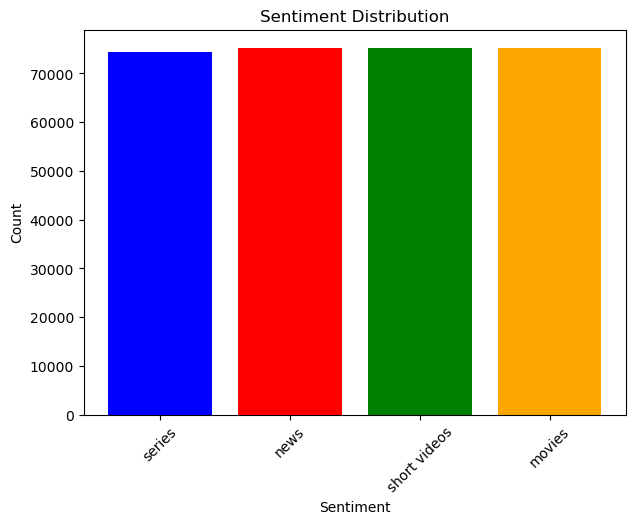

In [50]:
# Extract sentiment labels and counts
labels, counts = zip(*sentiment_counts.items())

# Plot sentiment distribution
plt.figure(figsize=(7,5))
plt.bar(labels, counts, color=['blue', 'red', 'green', 'orange'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.show()
